In [1]:
%matplotlib inline

from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt

In [2]:
class Strategy(Enum):
    CHANGE = 1
    KEEP = 2
    RANDOM = 3

In [3]:
seed()

def play_game(strategy):
    '''Simulate a Monty Hall game
    
    This function simulates the choice of a door, the elimination of a wrong door and the final choice.
    Since we only need the final result, it only returns it with no further details.
    
    Args:
        strategy (Strategy): the player's strategy

    Returns:
        bool: true if the player won, false otherwise
    '''

    doors = [0, 1, 2]
    winning_door = randint(0,2)
    
    first_choice = randint(0,2)
    doors.remove(first_choice)
    
    if first_choice == winning_door:
        doors.remove(doors[randint(0, 1)])
    else:
        doors = [winning_door]

    second_choice = 0
    
    if strategy == Strategy.RANDOM:
        if (randint(0, 1)):
            strategy = Strategy.KEEP
        else:
            strategy = Strategy.CHANGE
    
    if strategy == Strategy.CHANGE:
        second_choice = doors[0]
    elif strategy == Strategy.KEEP:
        second_choice = first_choice
    else:
        raise ValueError("Unknown Strategy")

    return second_choice == winning_door

In [4]:
play_game(Strategy.CHANGE)

False

In [5]:
def play (strategy, nb_games):
    '''Simulate a given number of Monty Hall games
    
    This function returns the list of the outcomes of a given number of Monty Hall games.
    
    Args:
        strategy (Strategy): the player's strategy
        nb_games: the number of played games
    
    Returns:
        list: the list of the outcomes
    '''
    
    return [1 if play_game(strategy) else 0 for i in range(nb_games)]

In [6]:
print("When he systematically changed of door, the player won {} games out of 10 000."
      .format(sum(play(Strategy.CHANGE, 10000))))

print("When he systematically kept the same door, the player won {} games out of 10 000."
      .format(sum(play(Strategy.KEEP, 10000))))

When he systematically changed of door, the player won 6669 games out of 10 000.
When he systematically kept the same door, the player won 3349 games out of 10 000.


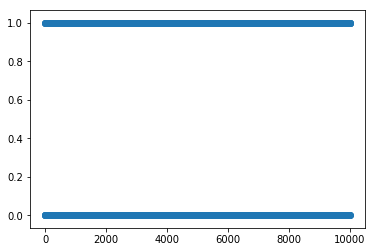

In [7]:
plot = plt.scatter(range(10000), play(Strategy.KEEP, 10000))

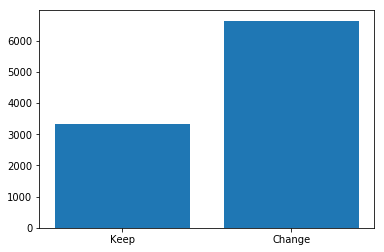

In [8]:
plot = plt.bar([1, 2],
               [sum(play(Strategy.KEEP, 10000)), sum(play(Strategy.CHANGE, 10000))],
               tick_label=["Keep", "Change"])

In [9]:
keep_outcomes = []
change_outcomes = []
random_outcomes = []

samples = [1000, 10000, 20000, 50000, 80000, 100000]

for nb_games in samples:
    keep_outcomes.append(play(Strategy.KEEP, nb_games))
    change_outcomes.append(play(Strategy.CHANGE, nb_games))
    random_outcomes.append(play(Strategy.RANDOM, nb_games))

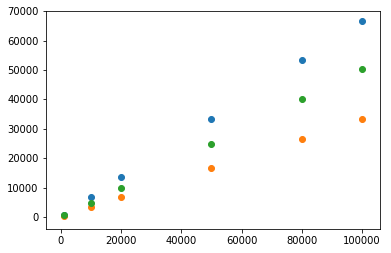

In [10]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in change_outcomes])
plot = plt.scatter(samples, [sum(x) for x in keep_outcomes])
plot = plt.scatter(samples, [sum(x) for x in random_outcomes])

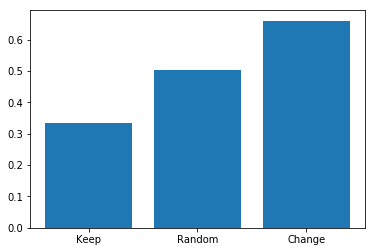

In [11]:
plot = plt.bar([1, 2, 3],
               [sum(play(Strategy.KEEP, 10000)) / 10000, sum(play(Strategy.RANDOM, 10000)) / 10000, sum(play(Strategy.CHANGE, 10000)) / 10000],
               tick_label=["Keep", "Random", "Change"])